<a href="https://colab.research.google.com/github/CU-Rocketry/ModSim/blob/main/Flight_Sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Add README, psuedocode.

# **Current Issues/ To-Do**


-   testflight info
-readme/psuedocode
-dispersion analysis



In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import netCDF4 as nt
import rocketpy as rp
from rocketpy import Environment, Rocket, SolidMotor, Flight
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install netCDF4
!pip install rocketpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.8/278.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65860 sha256=6ee2b8bd9908339c51c8826a6497b62eafbb0eb4083f94f904429c2ad4edcc8d
  Stored in directory: /root/.cache/pip/wheels/16/7c/e6/621a95f24bd1ff987368f1c37881ffe013433ff6b413d87fcb
Successfully built simplekml


In [ ]:
env = Environment(
    latitude=32.990254,
    longitude=-106.974998,
    elevation=1400,
)

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
  (tomorrow.year, tomorrow.month, tomorrow.day, 12), timezone="America/Denver"
) # Tomorrow's date in year, month, day, hour UTC format

env.set_atmospheric_model(type='Forecast', file='GFS')

/usr/local/lib/python3.10/dist-packages/rocketpy/environment/environment.py:2123: UserWarning: Exact chosen launch time is not available in the provided file, using 2024-02-19 18:00:00 UTC instead.
  warnings.warn(



Gravity Details

Acceleration of gravity at surface level:    9.7911 m/s²
Acceleration of gravity at  79.223 km (ASL): 9.5557 m/s²


Launch Site Details

Launch Date: 2024-02-19 19:00:00 UTC | 2024-02-19 12:00:00 America/Denver
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.223 km
Forecast Time Period: From  2024-02-18 12:00:00  to  2024-03-05 12:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 2.15 m/s
Surface Wind Direction: 198.18°
Surface Wind Heading: 18.18°
Surface Pressure: 855.98 hPa
Surface Temperature: 285.72 K
Surface Air Density: 1.044 kg/m³
Surface Speed of Sound: 338.85

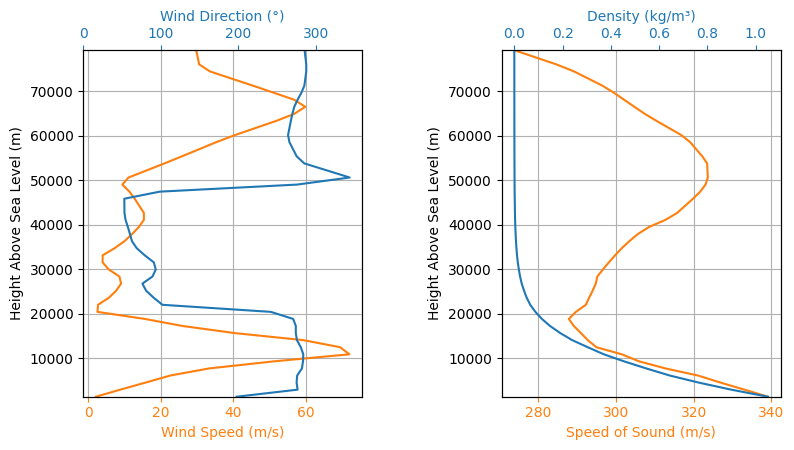

In [ ]:
env.info()

In [ ]:
AeroTechM2500 = SolidMotor(
    thrust_source="/content/drive/MyDrive/motor.eng",
    dry_mass=3.353,
    dry_inertia=(0.1633, 0.1633, 0.0041),
    center_of_dry_mass_position=0.317,
    grains_center_of_mass_position=0.3175,
    burn_time=3.9,
    grain_number=4,
    grain_separation=0.005,
    grain_density=1815,
    grain_outer_radius=0.0875,
    grain_initial_inner_radius=0.0285,
    grain_initial_height=0.1524,
    nozzle_radius=0.085,
    throat_radius=0.0354,
    interpolation_method="linear",
    nozzle_position=0,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Nozzle Details
Nozzle Radius: 0.085 m
Nozzle Throat Radius: 0.0354 m

Grain Details
Number of Grains: 4
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.0875 m
Grain Inner Radius: 0.0285 m
Grain Height: 0.1524 m
Grain Volume: 0.003 m3
Grain Mass: 5.947 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 23.789 kg
Average Propellant Exhaust Velocity: 401.756 m/s
Average Thrust: 2450.637 N
Maximum Thrust: 2861.69 N at 1.252 s after ignition.
Total Impulse: 9557.484 Ns



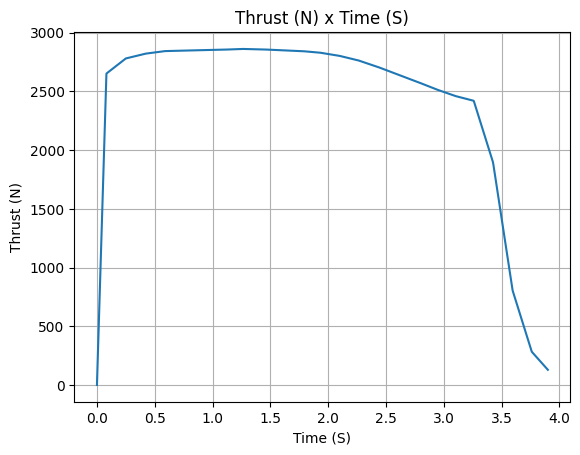

In [ ]:
AeroTechM2500.info()

In [ ]:
currera = Rocket(
    radius=0.0655, # m
    mass=22.9,  # without motor, kg
    inertia=(7.588, 7.588, 0.06), #assume long, long, rot
    power_off_drag="/content/drive/MyDrive/Mach_vs_Drag.csv",
    power_on_drag="/content/drive/MyDrive/Mach_vs_Drag.csv",
    center_of_mass_without_motor=1.34, # m (cg in or)
    coordinate_system_orientation="nose_to_tail",
)

buttons = currera.set_rail_buttons(
   upper_button_position=0.75,
   lower_button_position=1.75,
   angular_position=45,
)

currera.add_motor(AeroTechM2500, position= 1.95) #need to change

nose = currera.add_nose(
    length=0.686, kind="vonKarman", position= 0 #m
)

fins = currera.add_trapezoidal_fins(
    n=4,
    root_chord=0.279,
    tip_chord=0.076,
    span=0.013,
    sweep_length= 0.206,
    cant_angle=63.8,
    position= 2.25,
)

tail = currera.add_tail( # need to change
    top_radius=0.131, bottom_radius=0.102, length=0.076, position=2.55,
)

In [ ]:
currera.info()


Inertia Details

Rocket Mass: 22.900 kg (without motor)
Rocket Dry Mass: 26.253 kg (with unloaded motor)
Rocket Loaded Mass: 50.042 kg (with loaded motor)
Rocket Inertia (with unloaded motor) 11: 8.002 kg*m2
Rocket Inertia (with unloaded motor) 22: 8.002 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.064 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0655 m
Rocket Frontal Area: 0.013478 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.037 m
Rocket Center of Dry Mass - Nozzle Exit: 0.573 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.255 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.121 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 0.134/rad
Tail Lift Coefficient Derivative: -3.150

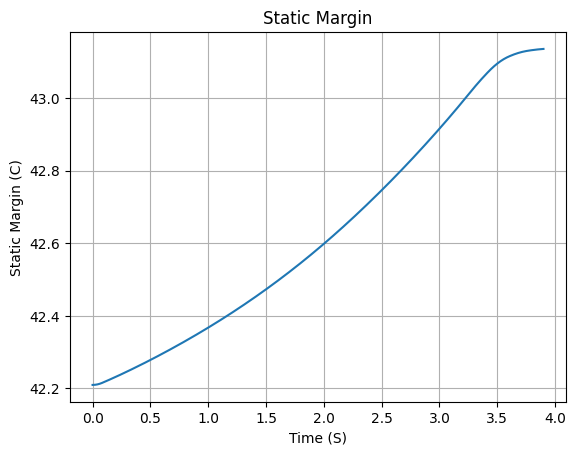

In [ ]:
currera.plots.static_margin()

In [ ]:
test_flight = Flight(
  rocket=currera, environment=env, rail_length=5.2, inclination=85, heading=0
)

In [ ]:
test_flight.info()


Initial Conditions



ValueError: array must not contain infs or NaNs

In [ ]:
test_flight.all_info()

In [ ]:
test_flight.export_kml(file_name="test_flight.kml")

#Importing Google Sheets

In [ ]:
import pandas

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds,_  = default()

gc = gspread.authorize(creds)

#name of google sheets
worksheet = gc.open('Experiment-9').sheet1

D4 = worksheet.acell('D4').value
print(D4)

Row1 = worksheet.row_values(1)
print(Row1)

Column1 = worksheet.col_values(1)
print(Column1)

Column1Data = worksheet.get('A2:A7')
print(Column1Data)

30.511217
['VideoAnalysis: Time (s)', 'VideoAnalysis: X (px)', 'VideoAnalysis: Y (px)', 'VideoAnalysis: X Velocity (px/s)', 'VideoAnalysis: Y Velocity (px/s)']
['VideoAnalysis: Time (s)', '0', '0.033333', '0.066667', '0.1', '0.966667', '1.001667', '1.035', '1.068333', '1.101667', '1.135', '1.168333', '1.201667', '1.235', '1.268333', '1.301667', '1.335', '1.368333', '1.401667', '1.435', '1.468333', '1.501667', '1.535', '1.568333', '1.601667', '1.635', '1.668333', '1.701667', '1.735', '1.768333', '1.801667', '1.835', '1.868333', '1.901667', '1.935', '1.968333', '2.001667', '2.035', '2.068333', '2.101667', '2.135', '2.168333', '2.201667', '2.235', '2.268333', '2.301667', '2.335']
[['0'], ['0.033333'], ['0.066667'], ['0.1'], ['0.966667'], ['1.001667']]


# DISPERSION ANALYSIS
None of this has been changed, it was just copied from a website.

In [ ]:
!curl -o dispersion_analysis_inputs/Cd_PowerOff.csv --create-dirs https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/docs/notebooks/dispersion_analysis/dispersion_analysis_inputs/Cd_PowerOff.csv
!curl -o dispersion_analysis_inputs/Cd_PowerOn.csv --create-dirs https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/docs/notebooks/dispersion_analysis/dispersion_analysis_inputs/Cd_PowerOn.csv
!curl -o dispersion_analysis_inputs/LASC2019_reanalysis.nc --create-dirs https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/docs/notebooks/dispersion_analysis/dispersion_analysis_inputs/LASC2019_reanalysis.nc
!curl -o dispersion_analysis_inputs/thrustCurve.csv --create-dirs https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/docs/notebooks/dispersion_analysis/dispersion_analysis_inputs/thrustCurve.csv
!curl -o dispersion_analysis_inputs/Valetudo_basemap_final.jpg --create-dirs https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/docs/notebooks/dispersion_analysis/dispersion_analysis_inputs/Valetudo_basemap_final.jpg
!mkdir -p dispersion_analysis_outputs

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1672  100  1672    0     0   5620      0 --:--:-- --:--:-- --:--:--  5629
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1666  100  1666    0     0   7544      0 --:--:-- --:--:-- --:--:--  7572
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  472k  100  472k    0     0  1368k      0 --:--:-- --:--:-- --:--:-- 1369k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2849  100  2849    0     0  12625      0 --:--:-- --:--:-- --:--:-- 12662
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
!pip install rocketpy imageio

In [ ]:
from time import process_time, time

from rocketpy import Environment, SolidMotor, Rocket, Flight

import numpy as np
from numpy.random import normal, choice
from IPython.display import display

In [ ]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.rcParams["figure.figsize"] = [8, 5]
mpl.rcParams["figure.dpi"] = 120
mpl.rcParams["font.size"] = 14
mpl.rcParams["legend.fontsize"] = 14
mpl.rcParams["figure.titlesize"] = 14

In [ ]:
#Nothing has been done yet

analysis_parameters = {
    # Mass Details
    # Rocket's dry mass without motor (kg) and its uncertainty (standard deviation)
    "rocket_mass": (7.257, 0.001),
    # Rocket's inertia moment perpendicular to its axis (kg*m^2)
    "rocket_inertia_11": (3.675, 0.03675),
    # Rocket's inertia moment relative to its axis (kg*m^2)
    "rocket_inertia_33": (0.007, 0.00007),
    # Motors's dry mass without propellant (kg) and its uncertainty (standard deviation)
    "motor_dry_mass": (1.000, 0.001),
    # Motor's dry inertia moment perpendicular to its axis (kg*m^2)
    "motor_inertia_11": (1.675, 0.01675),
    # Motors's dry inertia moment relative to its axis (kg*m^2)
    "motor_inertia_33": (0.003, 0.00003),
    # Distance between rocket's center of dry mass and motor's center of dry mass (m)
    "motor_dry_mass_position": (0.5, 0.001),
    # Propulsion Details - run help(SolidMotor) for more information
    # Motor total impulse (N*s)
    "impulse": (1415.15, 35.3),
    # Motor burn out time (s)
    "burn_time": (5.274, 1),
    # Motor's nozzle radius (m)
    "nozzle_radius": (21.642 / 1000, 0.5 / 1000),
    # Motor's nozzle throat radius (m)
    "throat_radius": (8 / 1000, 0.5 / 1000),
    # Motor's grain separation (axial distance between two grains) (m)
    "grain_separation": (6 / 1000, 1 / 1000),
    # Motor's grain density (kg/m^3)
    "grain_density": (1707, 50),
    # Motor's grain outer radius (m)
    "grain_outer_radius": (21.4 / 1000, 0.375 / 1000),
    # Motor's grain inner radius (m)
    "grain_initial_inner_radius": (9.65 / 1000, 0.375 / 1000),
    # Motor's grain height (m)
    "grain_initial_height": (120 / 1000, 1 / 1000),
    # Aerodynamic Details - run help(Rocket) for more information
    # Rocket's radius (kg*m^2)
    "radius": (40.45 / 1000, 0.001),
    # Distance between rocket's center of dry mass and nozzle exit plane (m) (negative)
    "nozzle_position": (-1.024, 0.001),
    # Distance between rocket's center of dry mass and and center of propellant mass (m) (negative)
    "grains_center_of_mass_position": (-0.571, 0.001),
    # Multiplier for rocket's drag curve. Usually has a mean value of 1 and a uncertainty of 5% to 10%
    "power_off_drag": (0.9081 / 1.05, 0.033),
    # Multiplier for rocket's drag curve. Usually has a mean value of 1 and a uncertainty of 5% to 10%
    "power_on_drag": (0.9081 / 1.05, 0.033),
    # Rocket's nose cone length (m)
    "nose_length": (0.274, 0.001),
    # Axial distance between rocket's center of dry mass and nearest point in its nose cone (m)
    "nose_distance_to_CM": (1.134, 0.001),
    # Fin span (m)
    "fin_span": (0.077, 0.0005),
    # Fin root chord (m)
    "fin_root_chord": (0.058, 0.0005),
    # Fin tip chord (m)
    "fin_tip_chord": (0.018, 0.0005),
    # Axial distance between rocket's center of dry mass and nearest point in its fin (m)
    "fin_distance_to_CM": (-0.906, 0.001),
    # Launch and Environment Details - run help(Environment) and help(Flight) for more information
    # Launch rail inclination angle relative to the horizontal plane (degrees)
    "inclination": (84.7, 1),
    # Launch rail heading relative to north (degrees)
    "heading": (53, 2),
    # Launch rail length (m)
    "rail_length": (5.7, 0.0005),
    # Members of the ensemble forecast to be used
    "ensemble_member": list(range(10)),
    # Parachute Details - run help(Rocket) for more information
    # Drag coefficient times reference area for the drogue chute (m^2)
    "cd_s_drogue": (0.349 * 1.3, 0.07),
    # Time delay between parachute ejection signal is detected and parachute is inflated (s)
    "lag_rec": (1, 0.5),
    # Electronic Systems Details - run help(Rocket) for more information
    # Time delay between sensor signal is received and ejection signal is fired (s)
    "lag_se": (0.73, 0.16),
}

In [ ]:
def flight_settings(analysis_parameters, total_number):
    i = 0
    while i < total_number:
        # Generate a flight setting
        flight_setting = {}
        for parameter_key, parameter_value in analysis_parameters.items():
            if type(parameter_value) is tuple:
                flight_setting[parameter_key] = normal(*parameter_value)
            else:
                flight_setting[parameter_key] = choice(parameter_value)

        # Skip if certain values are negative, which happens due to the normal curve but isnt realistic
        if flight_setting["lag_rec"] < 0 or flight_setting["lag_se"] < 0:
            continue

        # Update counter
        i += 1
        # Yield a flight setting
        yield flight_setting

In [ ]:
def export_flight_data(flight_setting, flight_data, exec_time):
    # Generate flight results
    flight_result = {
        "out_of_rail_time": flight_data.out_of_rail_time,
        "out_of_rail_velocity": flight_data.out_of_rail_velocity,
        "max_velocity": flight_data.speed.max,
        "apogee_time": flight_data.apogee_time,
        "apogee_altitude": flight_data.apogee - Env.elevation,
        "apogee_x": flight_data.apogee_x,
        "apogee_y": flight_data.apogee_y,
        "impact_time": flight_data.t_final,
        "impact_x": flight_data.x_impact,
        "impact_y": flight_data.y_impact,
        "impact_velocity": flight_data.impact_velocity,
        "initial_static_margin": flight_data.rocket.static_margin(0),
        "out_of_rail_static_margin": flight_data.rocket.static_margin(
            flight_data.out_of_rail_time
        ),
        "final_static_margin": flight_data.rocket.static_margin(
            flight_data.rocket.motor.burn_out_time
        ),
        "number_of_events": len(flight_data.parachute_events),
        "execution_time": exec_time,
    }

    # Take care of parachute results
    if len(flight_data.parachute_events) > 0:
        flight_result["drogue_triggerTime"] = flight_data.parachute_events[0][0]
        flight_result["drogue_inflated_time"] = (
            flight_data.parachute_events[0][0] + flight_data.parachute_events[0][1].lag
        )
        flight_result["drogue_inflated_velocity"] = flight_data.speed(
            flight_data.parachute_events[0][0] + flight_data.parachute_events[0][1].lag
        )
    else:
        flight_result["drogue_triggerTime"] = 0
        flight_result["drogue_inflated_time"] = 0
        flight_result["drogue_inflated_velocity"] = 0

    # Write flight setting and results to file
    dispersion_input_file.write(str(flight_setting) + "\n")
    dispersion_output_file.write(str(flight_result) + "\n")


def export_flight_error(flight_setting):
    dispersion_error_file.write(str(flight_setting) + "\n")


In [ ]:
# Basic analysis info
filename = "dispersion_analysis_outputs/valetudo_rocket_v0"
number_of_simulations = 100

# Create data files for inputs, outputs and error logging
dispersion_error_file = open(str(filename) + ".disp_errors.txt", "w")
dispersion_input_file = open(str(filename) + ".disp_inputs.txt", "w")
dispersion_output_file = open(str(filename) + ".disp_outputs.txt", "w")

# Initialize counter and timer
i = 0

initial_wall_time = time()
initial_cpu_time = process_time()

# Define basic Environment object
Env = Environment(date=(2019, 8, 10, 21), latitude=-23.363611, longitude=-48.011389)
Env.set_elevation(668)
Env.max_expected_height = 1500
Env.set_atmospheric_model(
    type="Ensemble",
    file="dispersion_analysis_inputs/LASC2019_reanalysis.nc",
    dictionary="ECMWF",
)


# Set up parachutes. This rocket, named Valetudo, only has a drogue chute.
def drogue_trigger(p, h, y):
    # Check if rocket is going down, i.e. if it has passed the apogee
    vertical_velocity = y[5]
    # Return true to activate parachute once the vertical velocity is negative
    return True if vertical_velocity < 0 else False


# Iterate over flight settings
out = display("Starting", display_id=True)
for setting in flight_settings(analysis_parameters, number_of_simulations):
    start_time = process_time()
    i += 1

    # Update environment object
    Env.select_ensemble_member(setting["ensemble_member"])

    # Create motor
    Keron = SolidMotor(
        thrust_source="dispersion_analysis_inputs/thrustCurve.csv",
        burn_time=5.274,
        reshape_thrust_curve=(setting["burn_time"], setting["impulse"]),
        nozzle_radius=setting["nozzle_radius"],
        throat_radius=setting["throat_radius"],
        grain_number=6,
        grain_separation=setting["grain_separation"],
        grain_density=setting["grain_density"],
        grain_outer_radius=setting["grain_outer_radius"],
        grain_initial_inner_radius=setting["grain_initial_inner_radius"],
        grain_initial_height=setting["grain_initial_height"],
        interpolation_method="linear",
        coordinate_system_orientation="nozzle_to_combustion_chamber",
        nozzle_position=setting["nozzle_position"],
        grains_center_of_mass_position=setting["grains_center_of_mass_position"],
        dry_mass=setting["motor_dry_mass"],
        dry_inertia=(
            setting["motor_inertia_11"],
            setting["motor_inertia_11"],
            setting["motor_inertia_33"],
        ),
        center_of_dry_mass_position=setting["motor_dry_mass_position"],
    )
    # Create rocket
    Valetudo = Rocket(
        radius=setting["radius"],
        mass=setting["rocket_mass"],
        inertia=(
            setting["rocket_inertia_11"],
            setting["rocket_inertia_11"],
            setting["rocket_inertia_33"],
        ),
        power_off_drag="dispersion_analysis_inputs/Cd_PowerOff.csv",
        power_on_drag="dispersion_analysis_inputs/Cd_PowerOn.csv",
        center_of_mass_without_motor=0,
        coordinate_system_orientation="tail_to_nose",
    )
    Valetudo.set_rail_buttons(0.224, -0.93, 30)

    Valetudo.add_motor(Keron, position=0)

    # Edit rocket drag
    Valetudo.power_off_drag *= setting["power_off_drag"]
    Valetudo.power_on_drag *= setting["power_on_drag"]
    # Add rocket nose, fins and tail
    NoseCone = Valetudo.add_nose(
        length=setting["nose_length"],
        kind="vonKarman",
        position=setting["nose_distance_to_CM"] + setting["nose_length"],
    )
    FinSet = Valetudo.add_trapezoidal_fins(
        n=3,
        span=setting["fin_span"],
        root_chord=setting["fin_root_chord"],
        tip_chord=setting["fin_tip_chord"],
        position=setting["fin_distance_to_CM"],
        cant_angle=0,
        airfoil=None,
    )
    # Add parachute
    Drogue = Valetudo.add_parachute(
        "Drogue",
        cd_s=setting["cd_s_drogue"],
        trigger=drogue_trigger,
        sampling_rate=105,
        lag=setting["lag_rec"] + setting["lag_se"],
        noise=(0, 8.3, 0.5),
    )

    # Run trajectory simulation
    try:
        test_flight = Flight(
            rocket=Valetudo,
            environment=Env,
            rail_length=setting["rail_length"],
            inclination=setting["inclination"],
            heading=setting["heading"],
            max_time=600,
        )
        export_flight_data(setting, test_flight, process_time() - start_time)
    except Exception as E:
        print(E)
        export_flight_error(setting)

    # Register time
    out.update(
        f"Curent iteration: {i:06d} | Average Time per Iteration: {(process_time() - initial_cpu_time)/i:2.6f} s"
    )

# Done

## Print and save total time
final_string = f"Completed {i} iterations successfully. Total CPU time: {process_time() - initial_cpu_time} s. Total wall time: {time() - initial_wall_time} s"
out.update(final_string)
dispersion_input_file.write(final_string + "\n")
dispersion_output_file.write(final_string + "\n")
dispersion_error_file.write(final_string + "\n")

## Close files
dispersion_input_file.close()
dispersion_output_file.close()
dispersion_error_file.close()

'Curent iteration: 000013 | Average Time per Iteration: 2.017203 s'

KeyboardInterrupt: 

In [ ]:
filename = "dispersion_analysis_outputs/valetudo_rocket_v0"

# Initialize variable to store all results
dispersion_general_results = []

dispersion_results = {
    "out_of_rail_time": [],
    "out_of_rail_velocity": [],
    "apogee_time": [],
    "apogee_altitude": [],
    "apogee_x": [],
    "apogee_y": [],
    "impact_time": [],
    "impact_x": [],
    "impact_y": [],
    "impact_velocity": [],
    "initial_static_margin": [],
    "out_of_rail_static_margin": [],
    "final_static_margin": [],
    "number_of_events": [],
    "max_velocity": [],
    "drogue_triggerTime": [],
    "drogue_inflated_time": [],
    "drogue_inflated_velocity": [],
    "execution_time": [],
}

# Get all dispersion results
# Get file
dispersion_output_file = open(str(filename) + ".disp_outputs.txt", "r+")

# Read each line of the file and convert to dict
for line in dispersion_output_file:
    # Skip comments lines
    if line[0] != "{":
        continue
    # Eval results and store them
    flight_result = eval(line)
    dispersion_general_results.append(flight_result)
    for parameter_key, parameter_value in flight_result.items():
        dispersion_results[parameter_key].append(parameter_value)

# Close data file
dispersion_output_file.close()

# Print number of flights simulated
N = len(dispersion_general_results)
print("Number of simulations: ", N)

In [ ]:
print(
    f'Out of Rail Time -         Mean Value: {np.mean(dispersion_results["out_of_rail_time"]):0.3f} s'
)
print(
    f'Out of Rail Time - Standard Deviation: {np.std(dispersion_results["out_of_rail_time"]):0.3f} s'
)

plt.figure()
plt.hist(dispersion_results["out_of_rail_time"], bins=int(N**0.5))
plt.title("Out of Rail Time")
plt.xlabel("Time (s)")
plt.ylabel("Number of Occurences")
plt.show()

In [ ]:
print(
    f'Out of Rail Velocity -         Mean Value: {np.mean(dispersion_results["out_of_rail_velocity"]):0.3f} m/s'
)
print(
    f'Out of Rail Velocity - Standard Deviation: {np.std(dispersion_results["out_of_rail_velocity"]):0.3f} m/s'
)

plt.figure()
plt.hist(dispersion_results["out_of_rail_velocity"], bins=int(N**0.5))
plt.title("Out of Rail Velocity")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Number of Occurences")
plt.show()

In [ ]:
print(
    f'Apogee Time -         Mean Value: {np.mean(dispersion_results["apogee_time"]):0.3f} s'
)
print(
    f'Apogee Time - Standard Deviation: {np.std(dispersion_results["apogee_time"]):0.3f} s'
)

plt.figure()
plt.hist(dispersion_results["apogee_time"], bins=int(N**0.5))
plt.title("Apogee Time")
plt.xlabel("Time (s)")
plt.ylabel("Number of Occurences")
plt.show()

In [ ]:
# more things to graph later from the website.